# Hayward Fault Sequence Simulator

### By Yair Franco
##### Started April 24, 2024

Note: this code requires Python v3.10.0 or higher to run

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Time Model

Based on Lienkaemper, 2010: https://doi.org/10.1785/0120090129

In [12]:
present = datetime.now().year #or manual input to simulate what this code would do in the future

# dates = [1868, 1725, 1629, 1475, 1317, 1134, 957, 822, 660, 444, 247, 91]
# errors = [0, 38, 46, 47, 44, 77, 21, 40, 10, 42, 40, 40]

dates = [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]
errors = [40, 40, 42,10, 40, 21, 77, 44, 47, 46, 38, 0]

In [13]:
timeset = []

for i in range(len(dates)):
    r = [dates[i]-errors[i],dates[i],dates[i]+errors[i]]
    timeset.append(r)

print(timeset)

[[51, 91, 131], [207, 247, 287], [402, 444, 486], [650, 660, 670], [782, 822, 862], [936, 957, 978], [1057, 1134, 1211], [1273, 1317, 1361], [1428, 1475, 1522], [1583, 1629, 1675], [1687, 1725, 1763], [1868, 1868, 1868]]


### Create fake sequences to test

Values to test: 

Lienkaemper, 2010 gives RI of 161 and SD of 65

Parsons, 2008 (https://doi.org/10.1029/2008GL035887) gives an RI of 210 years and coeff. of var. 0.6 (SD = 126)

Parsons, 2012 (https://doi.org/10.1029/2012GL052275) gives an RI of 211, -SD = 95, +SD = 173

In [14]:
ri = 161
sd = 65


for i in range(10):
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)-1):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #print(fakeseq)
    print(f'Sequence {i+1} puts the 1868 earthquake in the year {fakeseq[-1]} instead.')

Sequence 1 puts the 1868 earthquake in the year 1799 instead.
Sequence 2 puts the 1868 earthquake in the year 1914 instead.
Sequence 3 puts the 1868 earthquake in the year 1640 instead.
Sequence 4 puts the 1868 earthquake in the year 1825 instead.
Sequence 5 puts the 1868 earthquake in the year 1850 instead.
Sequence 6 puts the 1868 earthquake in the year 1830 instead.
Sequence 7 puts the 1868 earthquake in the year 2045 instead.
Sequence 8 puts the 1868 earthquake in the year 1713 instead.
Sequence 9 puts the 1868 earthquake in the year 1917 instead.
Sequence 10 puts the 1868 earthquake in the year 1798 instead.


Let's count how long it takes for fake sequences to place the 1868 earthquake on the correct year.

In [15]:
success = False
att = 0

while success == False:
    att += 1
    #print(att)
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #print(fakeseq)
    success = fakeseq[-2] == dates[-1] #is the 12th generated earthquake in 1868?

print(f'It took {att} tries to generate a sequence placing the 1868 earthquake on the correct year')
print(f'This sequence places the next Hayward earthquake in the year {fakeseq[-1]}')
print(f'Successful sequence: {fakeseq}')
print(f'Lienkaemper sequence: {dates}')

It took 89 tries to generate a sequence placing the 1868 earthquake on the correct year
This sequence places the next Hayward earthquake in the year 2039
Successful sequence: [96, 301, 488, 691, 809, 956, 1060, 1266, 1371, 1529, 1669, 1868, 2039]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


Let's add another constraint: the 13th earthquake generated should be after the present (since there hasn't been one since 1868).

In [16]:
ri = 161
sd = 65
success = False
att = 0

while success == False:
    att += 1
    #print(att)
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #if fakeseq[-2] == dates[0] or fakeseq[-1] == present: print(fakeseq[-2],fakeseq[-1])

    if fakeseq[-2] == dates[-1] and fakeseq[-1] > present:
        success = True



print(f'It took {att} tries to generate a sequence placing the 1868 earthquake on the correct year')
print(f'This sequence places the next Hayward earthquake in the year {fakeseq[-1]}')
print(f'Successful sequence: {fakeseq}') 
print(f'Lienkaemper sequence: {dates}')

It took 2336 tries to generate a sequence placing the 1868 earthquake on the correct year
This sequence places the next Hayward earthquake in the year 2034
Successful sequence: [74, 259, 449, 549, 735, 879, 1012, 1215, 1368, 1512, 1679, 1868, 2034]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


This function returns the recurrence intervals for any given sequence. It'll be useful later

In [17]:
def calcRI(seq,getMean=0): #setting get mean to 1 will calculate RI mean and sd for the given sequence
    ri = []

    for i in range(len(seq)-1):
        interval = seq[i+1] - seq[i]
        ri.append(interval)

    match getMean:
        case 0:
            return ri

        case 1:
            mean = int(np.mean(ri))
            sd = int(np.std(ri))
            return ri, mean, sd
        
    # if getMean == 0: #for python versions older than 3.10, replace 'match' code with this
    #     return ri
    # elif getMean == 1:
    #     mean = int(np.mean(ri))
        # sd = int(np.std(ri))
    #     return ri, mean, sd

Now let's use Numpy's Gaussian RNG to favor the mean Lienkaemper dates, instead of using the average RI for the whole sequence. Additionally, let's consider all sequences placing the next earthquake before 2024 as fails (since the next earthquake has not happened yet).

Obviously, this will always return a sequence with an earthquake in 1868, since we know this event's exact date.

Since we do not know when the next earthquake will happen, we'll use the calculate the mean and SD of the RIs for our generated sequence, and make a guess based on the results.

In [18]:
success = False
att = 0

while success == False:
    att += 1
    seq = []

    for j in range(len(dates)):
        event = int(np.random.normal(dates[j],errors[j])) #random guess assuming normal distributions of given standard deviations
        seq.append(event)

    mean, sd = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence
    nextevent = seq[-1] + int(np.random.normal(mean, sd))
    seq.append(nextevent)

    if seq[-1] > present:
        success = True #is the 12th generated earthquake in 1868? Is the next one in the future?

print(f'Attempt count: {att}')
print(f'This sequence places the next Hayward earthquake in the year {seq[-1]}')
print(f'This sequence: {seq}')
print(f'Lienkaemper sequence: {dates}')

Attempt count: 1
This sequence places the next Hayward earthquake in the year 2049
This sequence: [182, 252, 432, 653, 903, 916, 1099, 1290, 1499, 1656, 1755, 1868, 2049]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


In [63]:
nextdates = []
s = 0
sequences = 100000
means = []
sds = []
sq = []

for i in range(sequences): #initialize sequences
    success = False
    att = 0

    while success == False:
        att += 1
        seq = []

        for j in range(len(dates)-1):
            add = False

            if j == 0: #set first event. No need for it to have certain bounds
                event = int(np.random.normal(dates[j],errors[j])) #random guess assuming normal distributions of given standard deviations
            elif j > 0:
                while add == False:
                    event = int(np.random.normal(dates[j],errors[j]))
                    # print(f'Adding event {j}: Year {event} Previous = {seq[j-1]} Fail? {event < seq[-1]}')
                    if event < seq[j-1]: #avoids events happening before the previous ones
                        continue
                    elif event >= seq[j-1]:
                        add = True
            seq.append(event)

        seq.append(dates[-1]) #add 1686 earthquake manually

        meanRI, sdRI = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence

        # means.append(mean)
        # sds.append(sd)
        add = False
        while add == False:
            nextevent = seq[-1] + int(np.random.normal(meanRI, sdRI))
            if nextevent < seq[-1]:
                continue
            elif nextevent >= seq[j-1]:
                add = True
                
        seq.append(nextevent)

        sq.append(seq)
        nextdates.append(seq[-1])
        success = True

print(nextdates)

[1872, 2027, 1926, 1979, 2091, 2014, 2088, 1927, 2046, 2041, 2011, 2083, 1988, 2090, 2018, 2003, 1989, 2059, 1961, 2019, 1981, 2033, 2016, 2133, 1898, 1980, 1929, 2045, 2005, 2149, 2014, 2033, 1961, 2015, 2049, 2077, 2047, 1999, 2017, 1945, 2057, 2082, 2138, 2049, 2026, 2071, 2042, 2148, 2027, 1887, 2016, 2166, 2008, 2100, 2047, 2128, 1993, 1987, 1930, 2127, 2125, 2212, 2028, 1915, 2108, 2047, 2196, 2041, 1983, 2008, 1993, 1978, 2005, 2039, 2107, 1913, 1976, 2015, 2079, 2073, 2022, 1981, 2011, 1941, 2068, 1976, 2095, 2008, 1898, 2050, 2027, 2053, 2023, 2125, 2050, 1990, 2008, 1952, 2072, 1982, 2016, 2022, 2032, 2022, 1977, 2035, 1984, 2025, 2014, 2000, 2075, 1897, 2028, 1940, 1935, 2102, 1991, 1994, 1994, 2031, 2062, 2033, 2162, 1999, 2197, 2046, 2068, 2005, 2026, 2013, 1954, 2019, 2042, 2011, 2021, 2134, 2049, 1978, 1993, 2055, 1989, 1958, 2019, 2032, 2053, 2069, 2127, 1995, 2070, 2031, 2015, 1940, 2099, 2018, 2088, 2007, 2066, 1971, 1976, 2005, 2002, 2009, 2006, 2062, 1999, 2056, 199

Let's visualize the sequences we've generated. They should look like a figure in Lienkaemper, 2010.

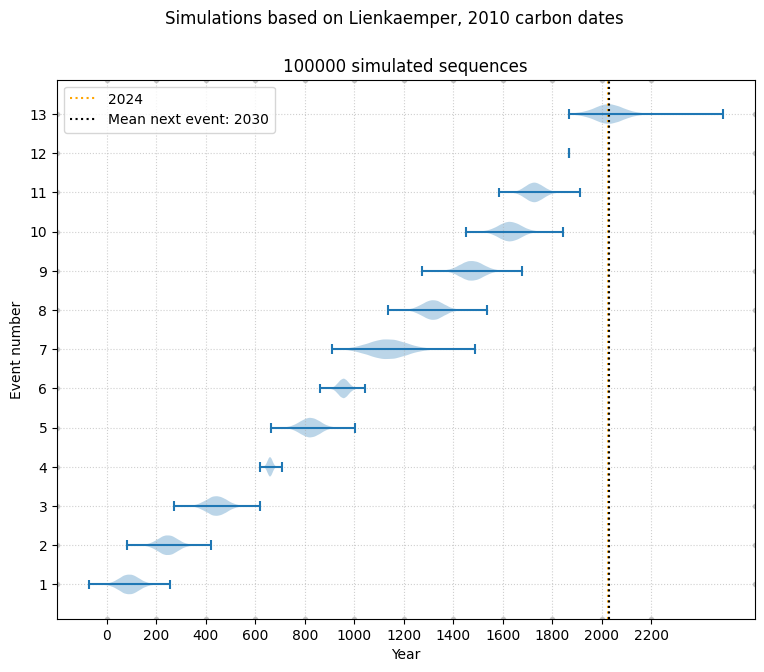

In [64]:
x = np.arange(1,len(seq)+1,1)

fig, ax = plt.subplots(figsize=(9,7))

fig.suptitle(f'Simulations based on Lienkaemper, 2010 carbon dates')

ax.set_title(f"{len(sq)} simulated sequences")
ax.set_ylabel(f"Event number")
ax.set_xlabel(f'Year')
ax.set_yticks(x)
ax.set_xticks(np.arange(0,2400,200))
ax.axvline(2024,linestyle=':',color='orange',label='2024')
ax.axvline(np.mean(nextdates),linestyle=':',color='black',label=f'Mean next event: {round(np.mean(nextdates))}')


by_event = []
for i in range(len(x)):
    by_event.append([ev[i] for ev in sq])

ax.violinplot(by_event,vert=False)
ax.grid(alpha=0.6,marker='.',ls=':')
ax.legend(loc=2)

plt.show()

Just for fun, let's make a histogram of the years this simulation gives for the next earthquake.

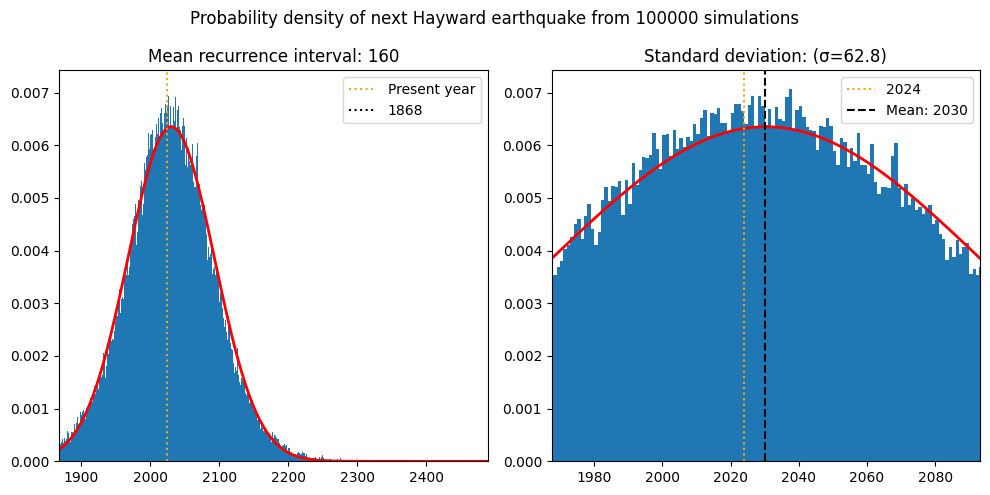

In [66]:
h = np.array([x[-1] for x in sq])
binsize = max(h) - min(h)
sigma = np.std(h)
mu = np.mean(h)

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))

fig.suptitle(f'Probability density of next Hayward earthquake from {len(h)} simulations')

count, bins, ignored = ax[0].hist(h, binsize, density=True) #plot main hist
gauss = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp((-1/2)*((bins-mu)/sigma)**2)

ax[0].set_title(f"Mean recurrence interval: {meanRI}")
ax[1].set_title(f"Standard deviation: (σ={round(sigma,1)})")

ax[0].plot(bins, gauss,
         linewidth=2, color='r')

ax[0].set_xlim(min(h),max(h))
ax[0].axvline(present,linestyle=':',color='orange',label='Present year')
ax[0].axvline(1868,linestyle=':',color='black',label='1868')
ax[0].legend()


ax[1].hist(h, binsize, density=True) #plot sub hist
ax[1].plot(bins, gauss,
         linewidth=2, color='r')

ax[1].axvline(2024,linestyle=':',color='orange',label='2024')
ax[1].axvline(round(mu),linestyle='--',color='black',label=f'Mean: {round(mu)}')

ax[1].set_xlim(mu-sigma,mu+sigma)
ax[1].legend()
#ax[1].set_xlim(2000,2100)

plt.show()

In [26]:
[x[-1] for x in sq]

[2097,
 1998,
 2004,
 2018,
 2034,
 1966,
 2148,
 1982,
 2069,
 1933,
 2159,
 2004,
 2047,
 2012,
 2055,
 2080,
 1875,
 2134,
 2172,
 2033,
 2005,
 2002,
 2017,
 2022,
 1954,
 2035,
 2015,
 2000,
 1936,
 2034,
 1969,
 2014,
 2019,
 1998,
 1956,
 2033,
 2022,
 1932,
 2146,
 1979,
 1972,
 2034,
 2006,
 1992,
 1991,
 2062,
 2108,
 1948,
 2021,
 2054,
 2029,
 2063,
 1989,
 1997,
 1935,
 1982,
 2060,
 2058,
 2038,
 1837,
 1959,
 2117,
 2160,
 1989,
 1910,
 2061,
 1982,
 1941,
 2057,
 2050,
 1975,
 2011,
 2148,
 2059,
 2133,
 2065,
 1962,
 1952,
 2050,
 1984,
 1898,
 1944,
 2049,
 2086,
 2059,
 2013,
 1955,
 2013,
 2065,
 1972,
 1998,
 1977,
 1986,
 2052,
 2035,
 2107,
 2168,
 2123,
 2046,
 1831,
 2054,
 2007,
 1989,
 2049,
 2083,
 1984,
 2063,
 1950,
 2038,
 2140,
 2105,
 1965,
 2060,
 1950,
 2119,
 2106,
 2070,
 1980,
 2023,
 2105,
 1965,
 2093,
 2024,
 2078,
 1994,
 1971,
 2011,
 1909,
 2026,
 2000,
 1929,
 2058,
 2051,
 2041,
 2048,
 2018,
 2120,
 2061,
 2109,
 2023,
 1961,
 1983,
 1961,